Andrew Perry

6/11/2022

CIS376 Course Project, Part 4

I will be including visualizations for comparing income and poverty rate between 2 separate instances in time; historical (2015-2019) and present (2019)

I grabbed the data using the pandas class and creating dataframes out of them indexed by counties

In [91]:
import pandas as pd

data = pd.read_csv("Income.csv")

#create lists for each important column
states = data["State"].tolist()
counties = data["County"].tolist()
income2015_2019 = data["Median household income (In 2019 dollars), 2015-19"].tolist()
povertyRate2015_2019 = data["Poverty rate, 2015-19"].tolist()
income2019 = data["Median household income (In 2019 dollars), 2019"].tolist()
povertyRate2019 = data["Poverty rate, 2019"].tolist()

#create a dictionary of the lists to be used in the dataframe
historicalData = {"County": counties,
        "Median Income": income2015_2019,
       "Poverty Rate": povertyRate2015_2019}
presentData = {"County": counties,
        "Median Income": income2019,
       "Poverty Rate": povertyRate2019}

#create a dataframe indexed by the counties
df1 = pd.DataFrame(historicalData, index=counties)
df2 = pd.DataFrame(presentData, index=counties)

I wanted to see how Johnston county ranked among the other counties of NC Historically. This will be using the historical dataframe and accessing only the range of NC counties.

<AxesSubplot:xlabel='Counties of NC', ylabel='Poverty Rate Percentage'>

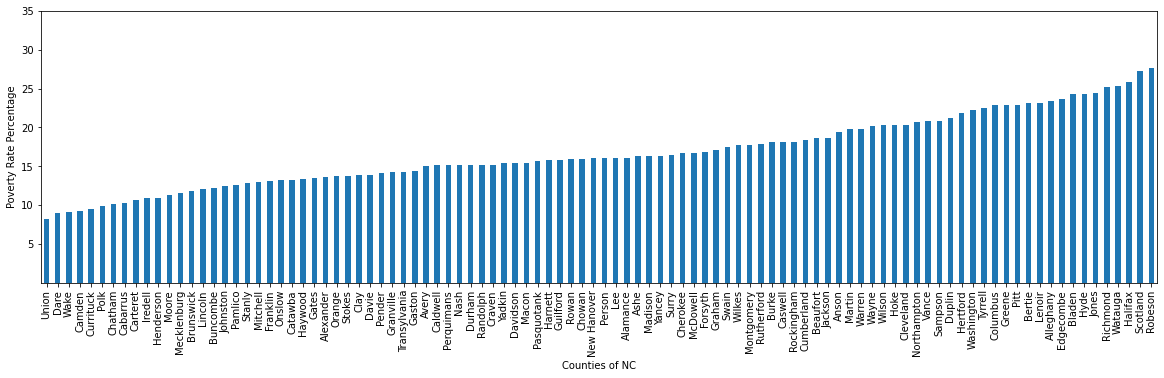

In [92]:
from matplotlib import pyplot as plt
import seaborn as sb

#create ticks for the x axis
ticks1 = [5, 10, 15, 20, 25, 30, 35]

#create an graph of ascending poverty rate values for N.C. historical
df1["Poverty Rate"][1889:1989].sort_values(ascending=True).plot.bar(x = df1["County"][1890:1989], figsize=(20,5), yticks=ticks1, xlabel="Counties of NC", ylabel="Poverty Rate Percentage")

I wanted to see how Johnston county ranked among the other counties of NC Present. This will be using the present dataframe and accessing only the range of NC counties.

<AxesSubplot:xlabel='Counties of NC', ylabel='Poverty Rate Percentage'>

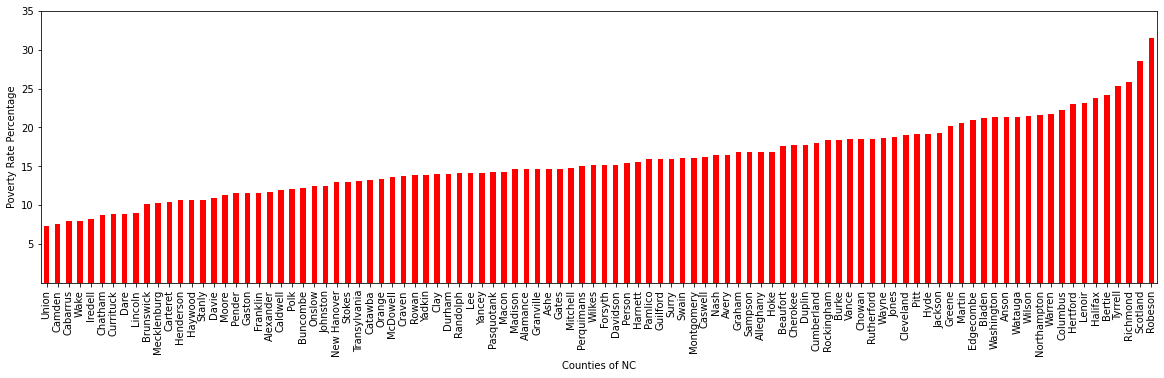

In [93]:
#create an graph of ascending poverty rate values for N.C. present
df2["Poverty Rate"][1889:1989].sort_values(ascending=True).plot.bar(x = df2["County"][1890:1989], figsize=(20,5), yticks=ticks1, color="red", xlabel="Counties of NC", ylabel="Poverty Rate Percentage")

I wanted to compare historical income to present income. Blue tips indicate historical income being higher and red tips indicate present income being higher. Purple bodies represent where historical and present intersect. This will be using both dataframes and plotting them both on the same bar graph using matplotlib

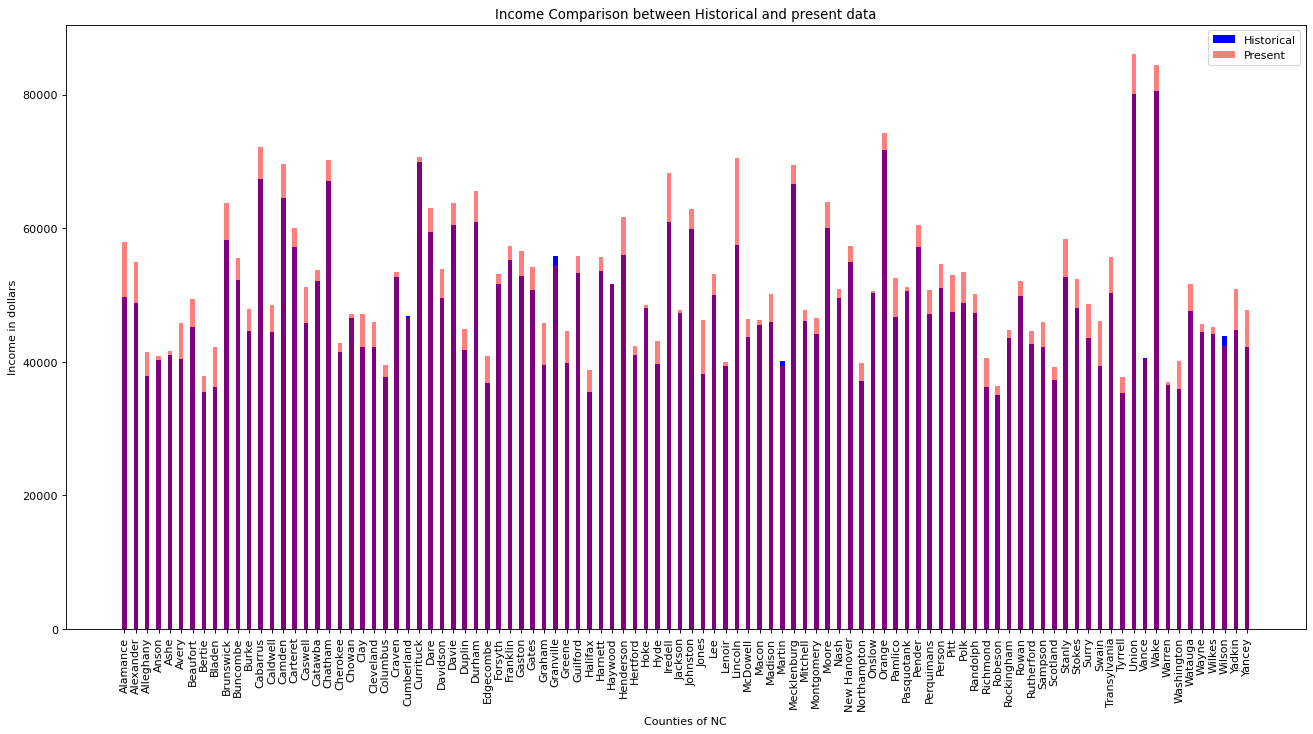

In [94]:
from matplotlib.pyplot import figure
figure(figsize =(20,10), dpi=80)

#create a bar chart that represents income for N.C. historical counties
plt.bar(df1["County"][1889:1989], df1["Median Income"][1889:1989], color ='Blue',
        width = 0.4, alpha=1)

#create a bar chart that represents income for N.C. present counties
plt.bar(df2["County"][1889:1989], df2["Median Income"][1889:1989], color ='Red',
        width = 0.4, alpha=.50)

#display the plot
plt.xticks(rotation=90)
plt.xlabel("Counties of NC")
plt.ylabel("Income in dollars")
plt.title("Income Comparison between Historical and present data")
plt.legend(["Historical", "Present"])
plt.show()

I wanted to compare historical poverty rate to present poverty rate. Blue tips indicate historical poverty rate being higher and red tips indicate present poverty rate being higher. Purple bodies represent where historical and present intersect. This will be using both dataframes and plotting them both on the same bar graph using matplotlib

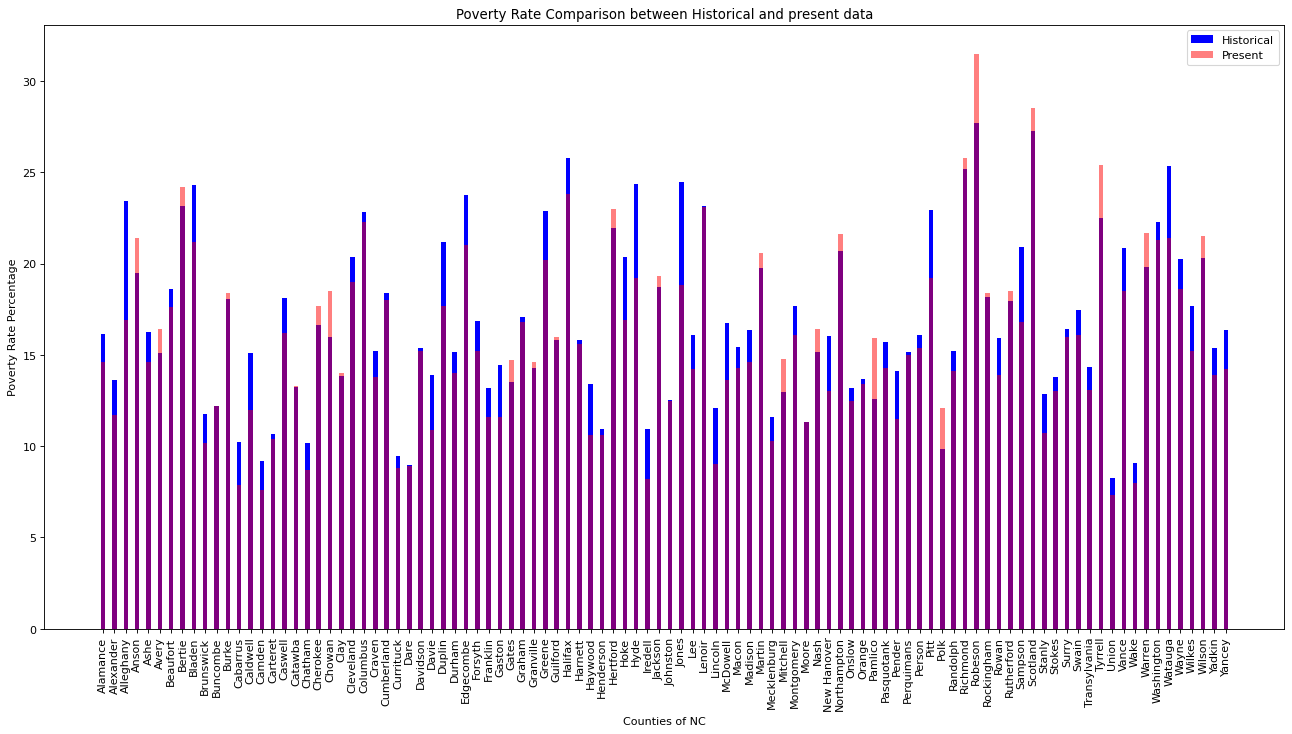

In [95]:
from matplotlib.pyplot import figure
figure(figsize =(20,10), dpi=80)

#create a bar chart that represents poverty rate for N.C. historical counties
plt.bar(df1["County"][1889:1989], df1["Poverty Rate"][1889:1989], color ='Blue',
        width = 0.4, alpha=1)

#create a bar chart that represents poverty rate for N.C. present counties
plt.bar(df2["County"][1889:1989], df2["Poverty Rate"][1889:1989], color ='Red',
        width = 0.4, alpha=.5)

#display the plot
plt.xticks(rotation=90)
plt.xlabel("Counties of NC")
plt.ylabel("Poverty Rate Percentage")
plt.title("Poverty Rate Comparison between Historical and present data")
plt.legend(["Historical", "Present"])
plt.show()

I wanted to see where historical data is spread out on a plot between the income and poverty rate. This will be using the pandas library's scatter function.

<AxesSubplot:title={'center':'All historical counties scattered between poverty rate and income'}, xlabel='Median Income', ylabel='Poverty Rate'>

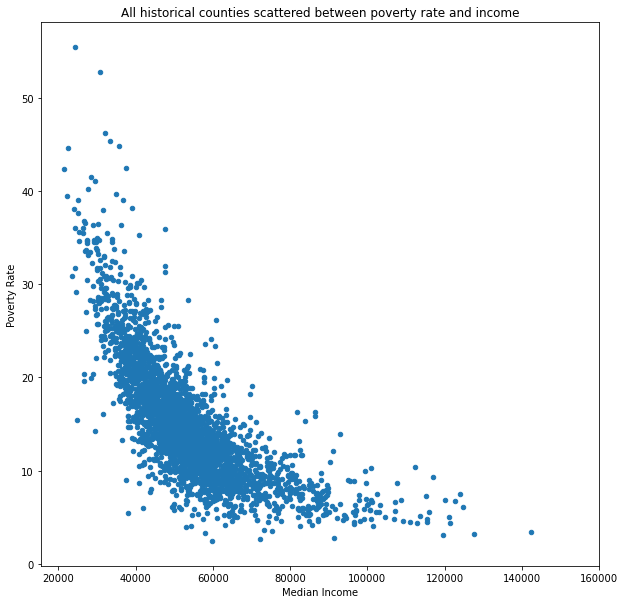

In [96]:
#create a dataframe indexed by the counties
ncdf1 = pd.DataFrame(historicalData, index=counties)
ncdf2 = pd.DataFrame(presentData, index=counties)

#create ticks for the x axis
ticks2 = [20000,40000,60000,80000,100000,120000,140000,160000]

#create a scatter plot when x is the median income and y is the povery rate
df1.plot.scatter(x = "Median Income", y = "Poverty Rate", figsize=(10,10), xticks=ticks2, title="All historical counties scattered between poverty rate and income")

I wanted to see where present data is spread out on a plot between the income and poverty rate. This will be using the pandas library's scatter function.

<AxesSubplot:title={'center':'All present counties scattered between poverty rate and income'}, xlabel='Median Income', ylabel='Poverty Rate'>

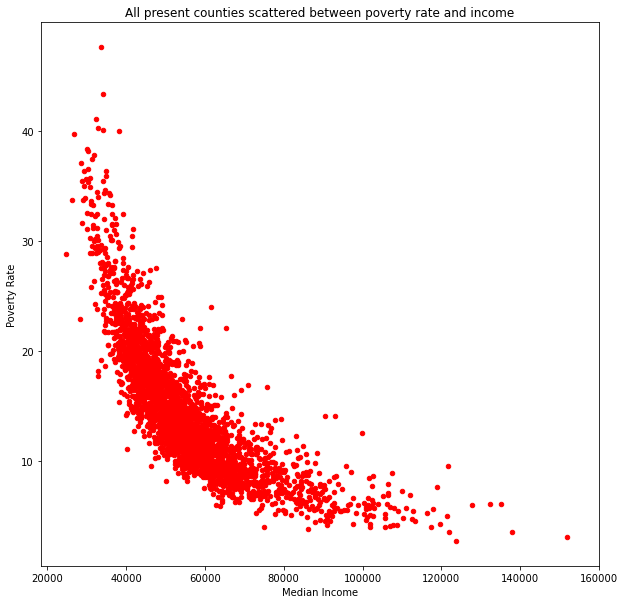

In [97]:
df2.plot.scatter(x = "Median Income", y = "Poverty Rate", figsize=(10,10), color="red", xticks=ticks2, title="All present counties scattered between poverty rate and income")

I wanted to see how historical data compared to present data by spreading out both on a plot between the income and poverty rate. This will be using matplotlib to graph both scatter plots on the same graph

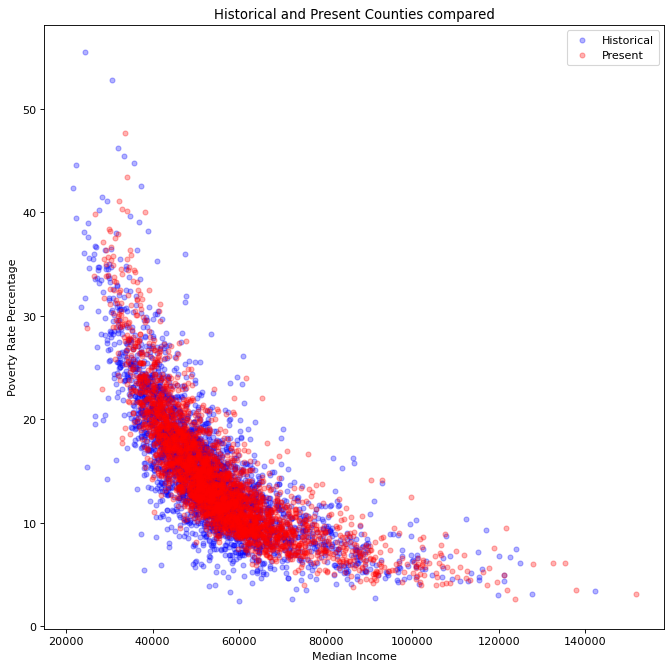

In [98]:
from matplotlib.pyplot import figure
figure(figsize =(10,10), dpi=80)
plt.scatter(df1["Median Income"],df1["Poverty Rate"], facecolors="Blue", alpha=.30, s=20)
plt.scatter(df2["Median Income"],df2["Poverty Rate"], facecolors="Red", alpha=.30, s=20)
plt.title("Historical and Present Counties compared")
plt.xlabel("Median Income")
plt.ylabel("Poverty Rate Percentage")
plt.legend(["Historical", "Present"])

I wanted to see a comparison between means of historical and present income and poverty rate. I used numpy to access methods of calculating the mean of the dataframe columns and matplotlib to graph

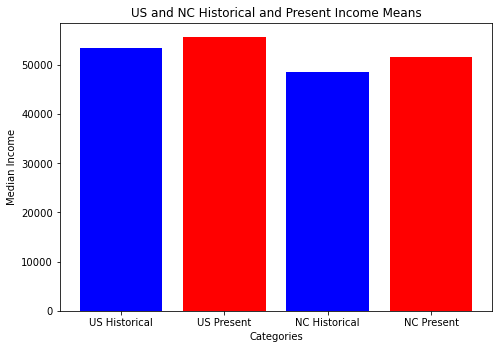

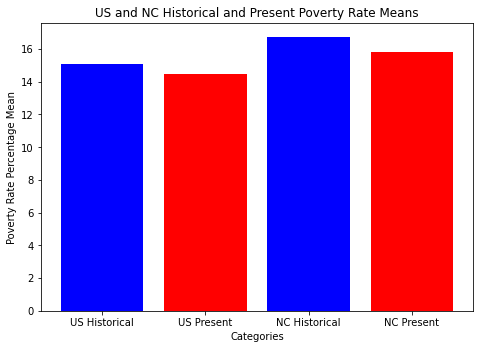

In [99]:
import numpy as np

#create dataframes indexed by state to search for values with the index of NC
ncdf1 = pd.DataFrame(historicalData, index=states)
ncdf2 = pd.DataFrame(presentData, index=states)

#create mean values for historical and present dataframes of U.S. counties
m1 = np.mean([float(x) for x in df1["Median Income"]])
m2 = np.mean([float(x) for x in df2["Median Income"]])
m3 = np.mean([float(x) for x in df1["Poverty Rate"]])
m4 = np.mean([float(x) for x in df2["Poverty Rate"]])

#create mean values for historical and present dataframes of N.C. counties
ncm1 = np.mean([float(x) for x in ncdf1.at["NC", "Median Income"]])
ncm2 = np.mean([float(x) for x in ncdf2.at["NC", "Median Income"]])
ncm3 = np.mean([float(x) for x in ncdf1.at["NC", "Poverty Rate"]])
ncm4 = np.mean([float(x) for x in ncdf2.at["NC", "Poverty Rate"]])

#display income mean values for U.S. and N.C. counties
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
incomeMeans = [m1, m2, ncm1, ncm2]
barlist = ax.bar(["US Historical","US Present","NC Historical",'NC Present'],incomeMeans, color = ["Blue", "Red", "Blue", "Red"])
ax.set_title("US and NC Historical and Present Income Means")
ax.set_xlabel("Categories")
ax.set_ylabel("Median Income")
plt.show()

#display poverty rate mean values for U.S. and N.C. counties
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
povertyRateMeans = [m3, m4, ncm3, ncm4]
ax.bar(["US Historical","US Present","NC Historical",'NC Present'],povertyRateMeans, color = ["Blue", "Red", "Blue", "Red"])
ax.set_title("US and NC Historical and Present Poverty Rate Means")
ax.set_xlabel("Categories")
ax.set_ylabel("Poverty Rate Percentage Mean")
plt.show()




I wanted to see a comparison between medians of historical and present income and poverty rate. I used numpy to access methods of calculating the median of the dataframe columns and matplotlib to graph

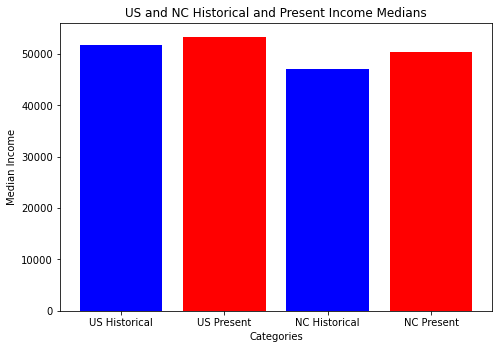

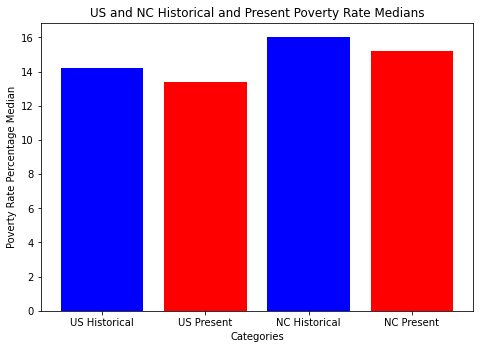

In [100]:
#create median values for historical and present dataframes of U.S. counties
m1 = np.median([float(x) for x in df1["Median Income"]])
m2 = np.median([float(x) for x in df2["Median Income"]])
m3 = np.median([float(x) for x in df1["Poverty Rate"]])
m4 = np.median([float(x) for x in df2["Poverty Rate"]])

#create median values for historical and present dataframes of N.C. counties
ncm1 = np.median([float(x) for x in ncdf1.at["NC", "Median Income"]])
ncm2 = np.median([float(x) for x in ncdf2.at["NC", "Median Income"]])
ncm3 = np.median([float(x) for x in ncdf1.at["NC", "Poverty Rate"]])
ncm4 = np.median([float(x) for x in ncdf2.at["NC", "Poverty Rate"]])

#display income median values for U.S. and N.C. counties
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
incomeMedians = [m1, m2, ncm1, ncm2]
ax.bar(["US Historical","US Present","NC Historical",'NC Present'],incomeMedians, color = ["Blue", "Red", "Blue", "Red"])
ax.set_title("US and NC Historical and Present Income Medians")
ax.set_xlabel("Categories")
ax.set_ylabel("Median Income")
plt.show()

#display poverty rate median values for U.S. and N.C. counties
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
povertyRateMedians = [m3, m4, ncm3, ncm4]
ax.bar(["US Historical","US Present","NC Historical",'NC Present'],povertyRateMedians, color = ["Blue", "Red", "Blue", "Red"])
ax.set_title("US and NC Historical and Present Poverty Rate Medians")
ax.set_xlabel("Categories")
ax.set_ylabel("Poverty Rate Percentage Median")
plt.show()

I wanted to see a comparison between modes of historical and present income and poverty rate. I used the statistics library to access methods of calculating the mode of the dataframe columns and matplotlib to graph.

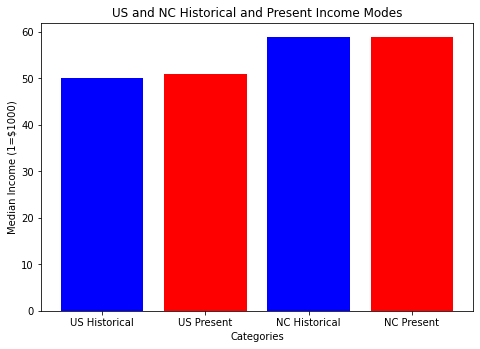

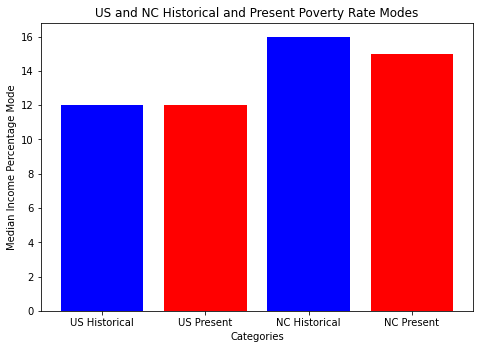

In [101]:
import statistics

#create dataframes indexed by states to search of counties with index of NC
ncdf1 = pd.DataFrame(historicalData, index=states)
ncdf2 = pd.DataFrame(presentData, index=states)

#create variables for nc values in dataframes
ncIncome2015_2019 = ncdf1.at["NC", "Median Income"]
ncPovertyRate2015_2019 = ncdf1.at["NC", "Poverty Rate"]
ncIncome2019 = ncdf2.at["NC", "Median Income"]
ncPovertyRate2019 = ncdf2.at["NC", "Poverty Rate"]


#create an adjusted income list for income from U.S. 2015 to 2019
adjustedIncomeForMode2015_2019 = []
for income in income2015_2019:
    adjustedIncomeForMode2015_2019.append(round(income / 1000))

#create an adjusted income list for income from U.S. 2019
adjustedIncomeForMode2019 = []
for income in income2019:
    adjustedIncomeForMode2019.append(round(income / 1000))

#create an adjusted poverty rate list for rates from U.S. 2015 to 2019
adjustedRateForMode2015_2019 = []
for rate in povertyRate2015_2019:
    adjustedRateForMode2015_2019.append(round(rate))

#create an adjusted poverty rate list for rates from U.S. 2019
adjustedRateForMode2019 = []
for rate in povertyRate2019:
    adjustedRateForMode2019.append(round(rate))

#create an adjusted income list for income from N.C. 2015 to 2019
adjustedIncomeForNCMode2015_2019 = []
for rate in ncIncome2015_2019:
    adjustedIncomeForNCMode2015_2019.append(round(income / 1000))

#create an adjusted income list for income from N.C. 2019
adjustedIncomeForNCMode2019 = []
for rate in ncIncome2019:
    adjustedIncomeForNCMode2019.append(round(income / 1000))

#create an adjusted poverty rate list for rates from N.C. 2015 to 2019
adjustedRateForNCMode2015_2019 = []
for rate in ncPovertyRate2015_2019:
    adjustedRateForNCMode2015_2019.append(round(rate))

#create an adjusted poverty rate list for rates from N.C. 2019
adjustedRateForNCMode2019 = []
for rate in ncPovertyRate2019:
    adjustedRateForNCMode2019.append(round(rate))

#create mode values for historical and present dataframes of U.S. counties
m1 = statistics.mode([float(x) for x in adjustedIncomeForMode2015_2019])
m2 = statistics.mode([float(x) for x in adjustedIncomeForMode2019])
m3 = statistics.mode([float(x) for x in adjustedRateForMode2015_2019])
m4 = statistics.mode([float(x) for x in adjustedRateForMode2019])

#create mode values for historical and present dataframes of N.C. counties
ncm1 = statistics.mode([float(x) for x in adjustedIncomeForNCMode2015_2019])
ncm2 = statistics.mode([float(x) for x in adjustedIncomeForNCMode2019])
ncm3 = statistics.mode([float(x) for x in adjustedRateForNCMode2015_2019])
ncm4 = statistics.mode([float(x) for x in adjustedRateForNCMode2019])

#display income mode values for U.S. and N.C. counties
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
incomeModes = [m1, m2, ncm1, ncm2]
ax.bar(["US Historical","US Present","NC Historical",'NC Present'],incomeModes, color = ["Blue", "Red", "Blue", "Red"])
ax.set_title("US and NC Historical and Present Income Modes")
ax.set_xlabel("Categories")
ax.set_ylabel("Median Income (1=$1000)")
plt.show()

#display poverty rate mode values for U.S. and N.C. counties
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
povertyRateModes = [m3, m4, ncm3, ncm4]
ax.bar(["US Historical","US Present","NC Historical",'NC Present'],povertyRateModes, color = ["Blue", "Red", "Blue", "Red"])
ax.set_title("US and NC Historical and Present Poverty Rate Modes")
ax.set_xlabel("Categories")
ax.set_ylabel("Median Income Percentage Mode")
plt.show()

I wanted to see a comparison between variances of historical and present income and poverty rate. I used numpy to access methods of calculating the variance of the dataframe columns and matplotlib to graph

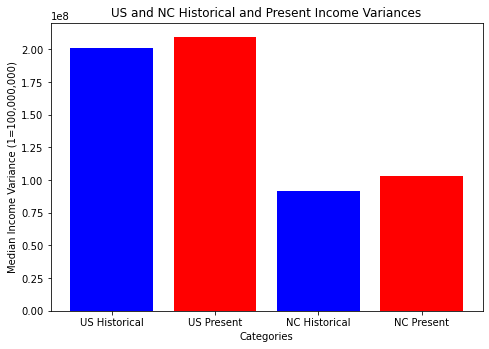

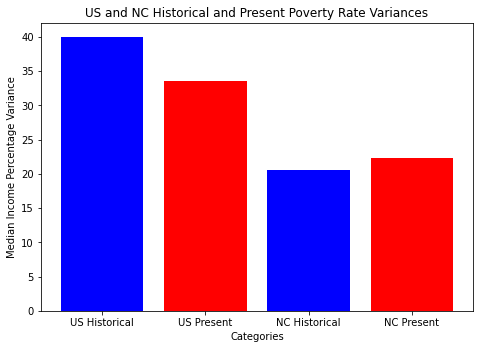

In [102]:
#create variance values for historical and present dataframes of U.S. counties
m1 = np.var([float(x) for x in df1["Median Income"]])
m2 = np.var([float(x) for x in df2["Median Income"]])
m3 = np.var([float(x) for x in df1["Poverty Rate"]])
m4 = np.var([float(x) for x in df2["Poverty Rate"]])

#create variance values for historical and present dataframes of N.C. counties
ncm1 = np.var([float(x) for x in ncdf1.at["NC", "Median Income"]])
ncm2 = np.var([float(x) for x in ncdf2.at["NC", "Median Income"]])
ncm3 = np.var([float(x) for x in ncdf1.at["NC", "Poverty Rate"]])
ncm4 = np.var([float(x) for x in ncdf2.at["NC", "Poverty Rate"]])

#display income variance values for U.S. and N.C. counties
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
incomeVariances = [m1, m2, ncm1, ncm2]
ax.bar(["US Historical","US Present","NC Historical",'NC Present'],incomeVariances, color = ["Blue", "Red", "Blue", "Red"])
ax.set_title("US and NC Historical and Present Income Variances")
ax.set_xlabel("Categories")
ax.set_ylabel("Median Income Variance (1=100,000,000)")
plt.show()

#display poverty rate variance values for U.S. and N.C. Counties
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
povertyRateVariances = [m3, m4, ncm3, ncm4]
ax.bar(["US Historical","US Present","NC Historical",'NC Present'],povertyRateVariances, color = ["Blue", "Red", "Blue", "Red"])
ax.set_title("US and NC Historical and Present Poverty Rate Variances")
ax.set_xlabel("Categories")
ax.set_ylabel("Median Income Percentage Variance")
plt.show()

I wanted to see a comparison between bellcurves of historical and present income and poverty rate. I used numpy to access methods of calculating the mean and standard deviation of the dataframe columns and used scipy.stats to perform additional claculations of the y-axis. Matplotlib to graph all bellcurves together.

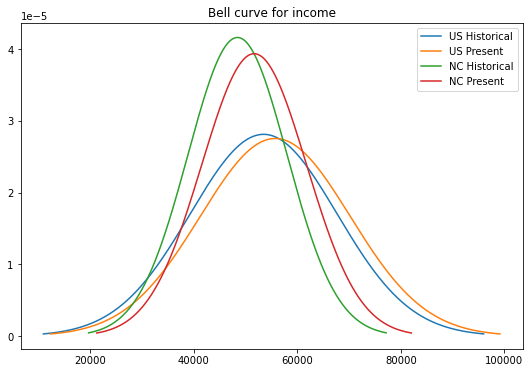

In [103]:
from scipy.stats import norm

#create mean values
m1 = np.mean([float(x) for x in df1["Median Income"]])
m2 = np.mean([float(x) for x in df2["Median Income"]])
ncm1 = np.mean([float(x) for x in ncdf1.at["NC", "Median Income"]])
ncm2 = np.mean([float(x) for x in ncdf2.at["NC", "Median Income"]])

#create standard deviation values
v1 = np.std([float(x) for x in df1["Median Income"]])
v2 = np.std([float(x) for x in df2["Median Income"]])
ncv1 = np.std([float(x) for x in ncdf1.at["NC", "Median Income"]])
ncv2 = np.std([float(x) for x in ncdf2.at["NC", "Median Income"]])

#create range of x-values from 3 standard deviations in increments of 100
x1 = np.arange(m1-(v1*3), m1+(v1*3), 100)
x2 = np.arange(m2-(v2*3), m2+(v2*3), 100)
ncx1 = np.arange(ncm1-(ncv1*3), ncm1+(ncv1*3), 100)
ncx2 = np.arange(ncm2-(ncv2*3), ncm2+(ncv2*3), 100)

#create range of y-values that correspond to normal pdf
y1 = norm.pdf(x1,m1,v1)
y2 = norm.pdf(x2,m2,v2)
ncy1 = norm.pdf(ncx1, ncm1, ncv1)
ncy2 = norm.pdf(ncx2, ncm2, ncv2)

#define plot 
fig, ax = plt.subplots(figsize=(9,6))
ax.plot(x1,y1)
ax.plot(x2,y2)
ax.plot(ncx1,ncy1)
ax.plot(ncx2,ncy2)
ax.set_xlabel = "Median Income"
ax.set_title("Bell curve for income")
ax.legend(["US Historical","US Present","NC Historical",'NC Present'])

#display the bell curves
plt.show()

I wanted to see a comparison between bellcurves of historical and present income and poverty rate. I used numpy to access methods of calculating the mean and standard deviation of the dataframe columns and used scipy.stats to perform additional claculations of the y-axis. Matplotlib to graph all bellcurves together.

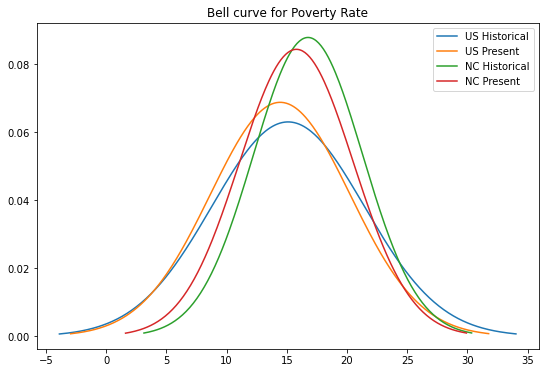

In [104]:
#create mean values
m3 = np.mean([float(x) for x in df1["Poverty Rate"]])
m4 = np.mean([float(x) for x in df2["Poverty Rate"]])
ncm3 = np.mean([float(x) for x in ncdf1.at["NC", "Poverty Rate"]])
ncm4 = np.mean([float(x) for x in ncdf2.at["NC", "Poverty Rate"]])

#create standard deviation values
v3 = np.std([float(x) for x in df1["Poverty Rate"]])
v4 = np.std([float(x) for x in df2["Poverty Rate"]])
ncv3 = np.std([float(x) for x in ncdf1.at["NC", "Poverty Rate"]])
ncv4 = np.std([float(x) for x in ncdf2.at["NC", "Poverty Rate"]])

#create range of x-values from 3 standard deviations in increments of .1
x3 = np.arange(m3-(v3*3), m3+(v3*3), .1)
x4 = np.arange(m4-(v4*3), m4+(v4*3), .1)
ncx3 = np.arange(ncm3-(ncv3*3), ncm3+(ncv3*3), .1)
ncx4 = np.arange(ncm4-(ncv4*3), ncm4+(ncv4*3), .1)

#create range of y-values that correspond to normal pdf
y3 = norm.pdf(x3,m3,v3)
y4 = norm.pdf(x4,m4,v4)
ncy3 = norm.pdf(ncx3, ncm3, ncv3)
ncy4 = norm.pdf(ncx4, ncm4, ncv4)

#define plot 
fig, ax = plt.subplots(figsize=(9,6))
ax.plot(x3,y3)
ax.plot(x4,y4)
ax.plot(ncx3,ncy3)
ax.plot(ncx4,ncy4)
ax.set_xlabel = "Poverty Rate Percentage"
ax.set_title("Bell curve for Poverty Rate")
ax.legend(["US Historical","US Present","NC Historical",'NC Present'])

#display the bell curves
plt.show()